In [748]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [749]:
data = pd.read_csv('loan-recovery-data.csv')
data.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [750]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

From above, I can clearly see there is no missing values in the dataset. Also, by looking at the data types of each column, I can surely say I don't need to change the data type of any column to analyze the data

Since there is no need of cleaning the dataset, I'll move ahead & visualize the data to look if any correlation or trend exists. 

First, I'll look at the distribution of loan amount & its relationship with monthly income.

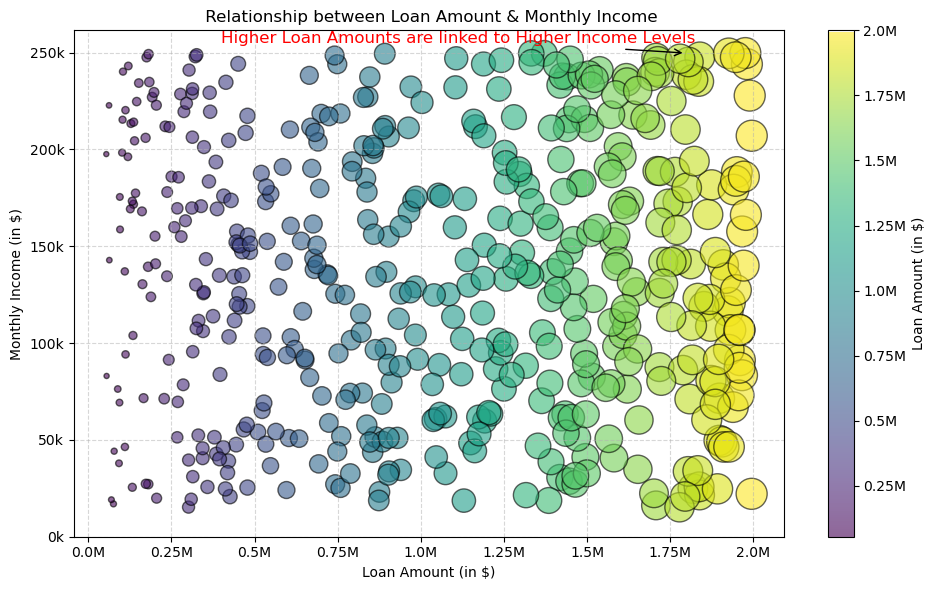

In [753]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Loan_Amount'], data['Monthly_Income'],
                      c= data['Loan_Amount'], cmap='viridis',
                      s= data['Loan_Amount'] / data['Loan_Amount'].max() * 500,
                     alpha= 0.6, edgecolors= 'k')
plt.annotate(
    text= 'Higher Loan Amounts are linked to Higher Income Levels',
    xy= (max(data['Loan_Amount']) * 0.9, max(data['Monthly_Income'])),
    xytext= (max(data['Loan_Amount']) * 0.2, max(data['Monthly_Income']) * 1.02),
    arrowprops= dict(facecolor= 'red', arrowstyle= '->'),
    fontsize= 12, color= 'red'
)

plt.xlabel("Loan Amount (in $)")
plt.ylabel("Monthly Income (in $)")
plt.title(" Relationship between Loan Amount & Monthly Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

cbar = plt.colorbar(scatter, label="Loan Amount (in $)")

xloc, _ = plt.xticks()
plt.xticks(ticks = xloc[1:-1], labels= [f'{tick / 1e6}M' for tick in xloc[1:-1]])

yloc, _ = plt.yticks()
plt.yticks(ticks= yloc[:-1], labels= [f'{int(tick / 1e3)}k' for tick in yloc[:-1]])

cbar.set_ticks(ticks= cbar.get_ticks()[1:], labels= [f'{tick / 1e6}M' for tick in cbar.get_ticks()[1:]])
plt.show()

- The graph indicates a **positive correlation** between monthly income and loan amount which means borrowers with higher incomes are generally able to secure higher loan amounts.  
- Interestingly, the bank has also approved **large loans to borrowers with relatively low monthly income**, which may represent riskier lending decisions.  
- To properly evaluate whether these lending decisions were successful, I need to analyze the data further with respect to the **Recovery_Status** (i.e., whether the loans were fully recovered, partially recovered, or written off).  


Now, I'll see whether payment history plays any role in loan recovery.

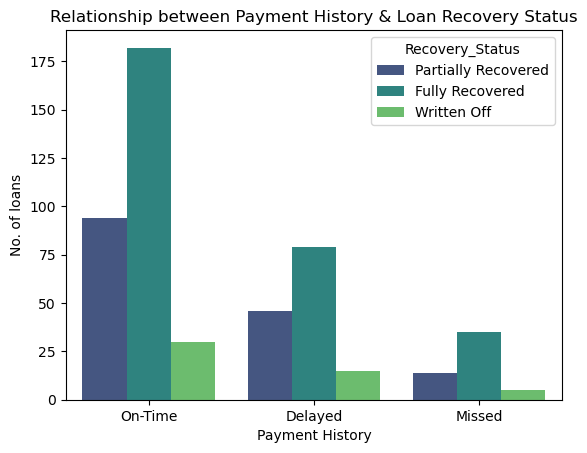

In [756]:
sns.countplot(data, x= 'Payment_History', hue= 'Recovery_Status', palette= 'viridis')
plt.title('Relationship between Payment History & Loan Recovery Status')
plt.xlabel('Payment History')
plt.ylabel('No. of loans')
plt.show()

From the plot, I can see
- **On-time payments → Mostly fully recovered loans:**
    - Loans with on-time payments are mostly fully recovered.
- **Delayed payments → Mixed recovery outcomes:** 
    - Some loans are fully recovered, but a noticeable no. of loans ends up only partial recovered or written off.
- **Missed payments → Very low recovery rate.** 
    - The majority of these loans either result in partial recovery or are completely written off, making this group the riskiest.

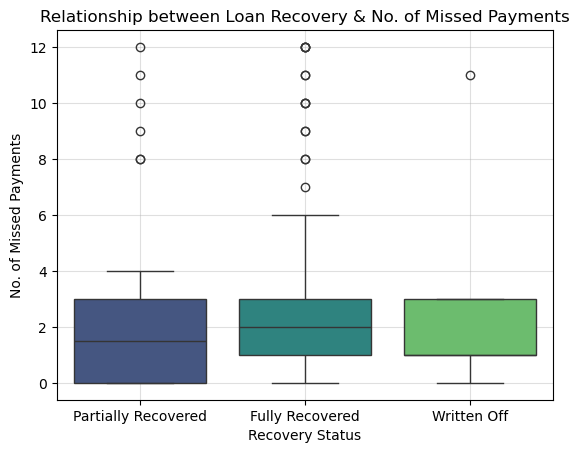

In [758]:
sns.boxplot(data, x= 'Recovery_Status', y= 'Num_Missed_Payments', hue= 'Recovery_Status', palette= 'viridis')
plt.title('Relationship between Loan Recovery & No. of Missed Payments')
plt.xlabel('Recovery Status')
plt.ylabel('No. of Missed Payments')
plt.grid(alpha= 0.4)
plt.show()

## Insights from the boxplot:

---

### What does the Partially Recovered box tell us?  
- The median missed payments is around **1**, but the box has a wide range.  
- There is **no bottom whisker**, which means the minimum values are very close to the lower quartile (Q1).  
- The **5 outlier points** above the box represent borrowers who missed an unusually high number of payments compared to others in this category. Despite this, some portion of their loan was still recovered, likely through collateral or partial settlements.  

---

### What does the Fully Recovered box tell us?  
- The median is around **2 missed payments**, showing that most borrowers in this group had very few missed installments.  
- The distribution is tighter compared to “Partially Recovered,” indicating more consistent repayment behavior.  
- The **6 outliers** above the box represent borrowers who missed far more payments than usual but still managed to fully repay their loans. These are exceptional cases where borrowers might have cleared dues late in bulk.  

---

### What does the Written Off box tell us?  
- The box ranges roughly from **1 to 3 missed payments**, which shows that most written-off loans defaulted after only a few missed installments.  
- The **median line is not visible** because it coincides with either Q1 or Q3 (the distribution is very narrow).  
- There is **no top whisker**, meaning that all values above the upper quartile were treated as outliers.  
- The **single outlier point** represents an exceptional borrower who missed far more payments than the rest before their loan was finally written off.
---




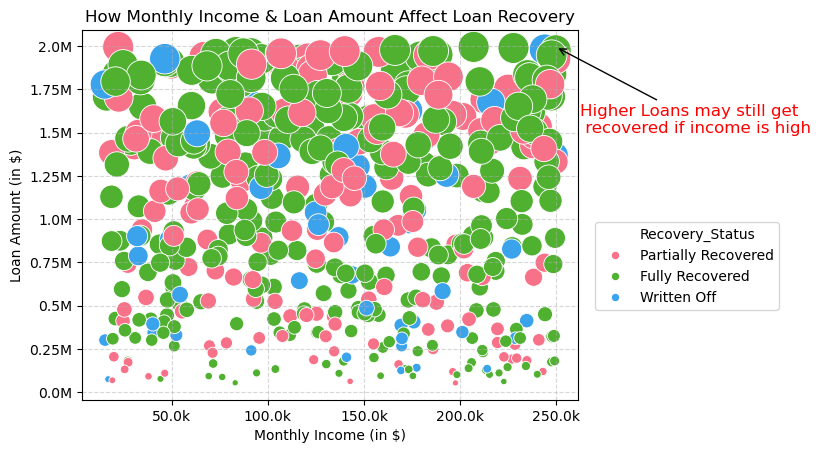

In [760]:
sns.scatterplot(data, x= 'Monthly_Income', y= 'Loan_Amount', 
                hue= 'Recovery_Status', palette= 'husl',
               size= 'Loan_Amount',sizes= (20, 500), legend= 'brief'
               )
plt.annotate(
    text= 'Higher Loans may still get\n recovered if income is high',
    xy= (max(data['Monthly_Income']), max(data['Loan_Amount'])),
    xytext= (max(data['Monthly_Income']) * 1.05, max(data['Loan_Amount']) * 0.75),
    arrowprops= dict(facecolor= 'red', arrowstyle= '->'),
    fontsize= 12, color= 'red'
)

plt.title('How Monthly Income & Loan Amount Affect Loan Recovery')
plt.xlabel("Monthly Income (in $)")
plt.ylabel("Loan Amount (in $)")
plt.grid(True, linestyle='--', alpha=0.5)

xloc, _ = plt.xticks()
plt.xticks(ticks = xloc[1:-1], labels= [f'{tick / 1e3}k' for tick in xloc[1:-1]])

yloc, _ = plt.yticks()
plt.yticks(ticks = yloc[1:-1], labels= [f'{tick / 1e6}M' for tick in yloc[1:-1]])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles= handles[:4], labels= labels[:4], bbox_to_anchor= (1.02, 0.5))

plt.show()

Here, I analyzed the relation between monthly income & loan amount with respect to loan reovery status. For this purpose, I plotted the scatter plot between monthly income & loan amount keeping recovery status in hue. For better visualization, I encoded the marker size to loan amount, meaning larger circles represent bigger loans.

---
From the plot, I can see that:
- borrowers with high income are most likely to repay their complete loan.
- borrowers with low income are most likely to repay the loan partially or the bank might have write off those borrowers due to no repayment.
- there are some borrowers with low income, but still managed to repay the whole loan whereas there are some borrowers with high income, but still their loans were either partially recovered or written off.

Now, I'll try to build the ML model to achieve the goal of the project.

In [763]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [764]:
data.columns[data.dtypes != 'object']

Index(['Age', 'Monthly_Income', 'Num_Dependents', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Collateral_Value', 'Outstanding_Loan_Amount',
       'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due',
       'Collection_Attempts'],
      dtype='object')

From the data, I chose 10 numerical features that are important for predicting loan recovery.

In [766]:
features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure','Interest_Rate', 'Collateral_Value', 'Outstanding_Loan_Amount',
            'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

Before starting to build the ML model, I need to scale the features because
- ML models like KMeans, Logistic Regression can be biased if features are on a very different scales.
    - e.g., loan amount can be in millions while interest rate is in single/double digits. Without scaling, big numbers will dominate the model
- What StandardScaler() does is that it transforms each feature to have
    - Mean = 0
    - Standard Deviation = 1
- After this, the result data(data_scaled) will be a normalized array where all features are comparable.

In [768]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

- Now, I'll try to segment borrowers into distinct groups based on there financial behaviours.
- Clustering the data allows to achieve this goal.
- To achieve this goal, I'll use KMeans which is one of the most widely unsupervised leanring algorithm for segmentation. It's efficient & works well with numerical features. It minimizes the variance within each group, so that borrowers inside a cluster are as simialr as possible.
- The algorithm is easy to interpret: each cluster is defined by its centroid(the average borrower profile).

In [770]:
optimal_k = 4
kmeans = KMeans(n_clusters= optimal_k, n_init= 10, random_state= 42)
data['Borrower_Segment'] = kmeans.fit_predict(data_scaled)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


- I decided to use n_clusters= 4 to create 4  borrower segments, each representing a unique risk-income-loan profile.
- I used n_init= 10 to run the clustering multiple time with different initial centroids & to pick the best solution. It avoids bad initialization.
- Then I assigned each borrower a segment label(0, 1, 2, 3) in the new column 'Borrower_Segment'.

# How does KMeans work?
Let's understand this with an analogy:
Let's say I have a data of marks in Math & English of 30 students. I want to find groups of students with similar performances. Instead of checking manually, I'll use KMeans.
- Step - 1: I decided to create 3 groups (k = 3):
    -  Group A = Strong in both subjects
    -  Group B = Strong in English, weak in Math
    -  Group C = Weak in both

KMeans starts by randomly placing 3 group leaders(centroids) somewhere in the classroom.

- Step - 2: Assigning each student to nearest centroid
    - Each student checks: Which group leader is closest to their marks?
    - If a student scores high in both, they’ll move near Group A’s centroid. Same goes for group B & C.
    -  Students automatically assign themselves to the nearest centroid.
- Step - 3: Updating centroid(group leader):
    - The centroid (group leader) moves to the average marks of students in its group.
- Step - 4: Repeat:
    -  Students re-check which group they belong to, based on the updated centroid.
    -  Centroids move again, until eventually, the groups stop changing which menans stable clusters are formed.

Now, clusters have been assigned to each borrower profile(0, 1, 2, 3). Now let's try to interpret what each cluster means & mapping it to real-world meaning.

In [774]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due
0,-0.227134,-0.175521,-0.496398,-0.121867,-0.045330,-0.431991,-0.518788,-0.359573,-0.482250,-0.834880
1,0.265257,0.006038,0.984064,-1.213251,-0.135351,0.687142,1.475475,2.347308,0.134753,0.117816
2,0.241775,0.098731,-0.717791,0.164796,0.081731,-0.437075,-0.624029,-0.494577,0.566558,0.862537
3,-0.062877,0.117357,1.002954,0.438241,0.023350,0.741807,0.749783,0.087274,-0.028015,0.117449


**Note:** All these values are standardized values.
- 0 = feature mean (average borrower).
- Negative = below average.
- Positive = above average.
- The further from 0, the stronger the deviation.
---

- **Cluster 0**:
    - Age: -0.23 → Slightly younger than avg.
    - Monthly Income: -0.18 → Lower than avg.
    - Loan Amount: -0.50 → Smaller loans.
    - Loan Tenure: -0.12 → Slightly shorter terms.
    - Interest Rate: ~0 → Average.
    - Collateral Value: -0.43 → Lower collateral.
    - Outstanding Loan: -0.52 → Below avg.
    - Monthly EMI: -0.36 → Lower payments.
    - Missed Payments: -0.48 → Few missed payments.
    - Days Past Due: -0.83 → Very few delays.

It means Cluster 0 belongs to young, **low income - small loan** group.

-  **Cluster 1**:
    - Age: +0.27 → Slightly older.
    - Monthly Income: ~0 → Around avg income.
    - Loan Amount: +0.98 → Much higher loans.
    - Loan Tenure: -1.21 → Much shorter tenure.
    - Interest Rate: -0.14 → Slightly lower.
    - Collateral Value: +0.69 → Higher collateral.
    - Outstanding Loan: +1.48 → Very high debt.
    - Monthly EMI: +2.35 → Extremely high EMIs.
    - Missed Payments: +0.13 → Around average missed payments.
    - Days Past Due: +0.12 → Slightly late.

 It means Cluster 1 belongs to **average income - high loan** group.

- **Cluster 2**:
    - Age: +0.24 → Older.
    - Monthly Income: +0.10 → Slightly above avg income.
    - Loan Amount: -0.72 → Much smaller loans.
    - Loan Tenure: +0.16 → Slightly longer.
    - Interest Rate: +0.08 → Slightly higher.
    - Collateral Value: -0.44 → Lower collateral.
    - Outstanding Loan: -0.62 → Much lower debt.
    - Monthly EMI: -0.49 → Low EMI.
    - Missed Payments: +0.57 → More missed payments.
    - Days Past Due: +0.86 → Frequently late.

It means Cluster 2 belongs to **moderate to high income - small loan** group.

- **Cluster 3**:
    - Age: -0.06 → Around average.
    - Monthly Income: +0.12 → Above avg income.
    - Loan Amount: +1.00 → Much larger loans.
    - Loan Tenure: +0.44 → Longer terms.
    - Interest Rate: +0.02 → Normal.
    - Collateral Value: +0.74 → High collateral.
    - Outstanding Loan: +0.75 → Higher outstanding debt.
    - Monthly EMI: +0.09 → Slightly above avg.
    - Missed Payments: -0.03 → About average.
    - Days Past Due: +0.12 → Slightly late.

It means Cluster 3 belongs to **high income - high loan** group.

Now, I'll try to visualize the borrower segments based on monthly income & loan amount

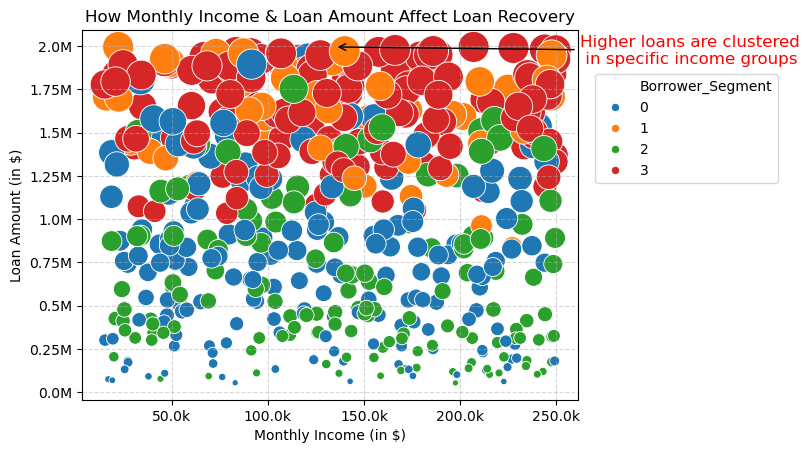

In [777]:
sns.scatterplot(data= data, x= 'Monthly_Income', y= 'Loan_Amount', hue= 'Borrower_Segment', palette= 'tab10',
               size= 'Loan_Amount',sizes= (20, 500), legend= 'brief')

plt.annotate(
    text= 'Higher loans are clustered\n in specific income groups',
    xy= (data['Monthly_Income'].mean(), max(data['Loan_Amount'])),
    xytext= (data['Monthly_Income'].max() * 1.05, max(data['Loan_Amount']) * 0.95),
    arrowprops= dict(facecolor= 'blue', arrowstyle= '->'),
    fontsize= 12, color= 'red'
)

plt.title('How Monthly Income & Loan Amount Affect Loan Recovery')
plt.xlabel("Monthly Income (in $)")
plt.ylabel("Loan Amount (in $)")
plt.grid(True, linestyle='--', alpha=0.5)

xloc, _ = plt.xticks()
plt.xticks(ticks = xloc[1:-1], labels= [f'{tick / 1e3}k' for tick in xloc[1:-1]])

yloc, _ = plt.yticks()
plt.yticks(ticks = yloc[1:-1], labels= [f'{tick / 1e6}M' for tick in yloc[1:-1]])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles= handles[:5], labels= labels[:5], bbox_to_anchor= (1.02, 0.9))

plt.show()

From the plot, I can see:

- Cluster 1 & 3 take on moderate to high loan amounts.
- Cluster 0 & 2 take on low to moderate loans with some taking significantly higher loan amounts.

Now I'll label each 'Borrower_Segment' to the corresponding real-world meaning.

- Cluster -> Real - World Meaning
    - 0: Low Income, Low Loan, Low Risk
    - 1: High Loan, Higher Default Risk
    - 2: Moderate Income, Medium Risk
    - 3: High Income, Low Default Risk

In [780]:
data['Segment_Name'] = data['Borrower_Segment'].map({
    0: 'Low Income, Low Loan, Low Risk',
    1: 'High Loan, Higher Default Risk',
    2: 'Moderate Income, Medium Risk',
    3: 'High Income, Low Default Risk'
})

Now, I'll flag each of the borrowers whether they are high risk borrowers or not.

- **1 → High Risk borrower**: 'High Loan, Higher Default Risk', 'Moderate Income, Medium Risk'
- **0 → Low Risk borrower**: 'Low Income, Low Loan, Low Risk', 'High Income, Low Default Risk'

In [782]:
data['High_Risk_Flag'] = data['Segment_Name'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, Medium Risk']
                                                    else 0)

- This binary classification helps simplify borrower segmentation into just two actionable categories: **risky vs safe**
- Now the dataset is ready for supervised learning model(I'll use Random Forest Classifier) to classify future borrowers as **High Risk** or **Low Risk** borrowers.

### Why should I choose Random Forest Classifier?
- I chose Random Forest Classifier because it provides the right balance between accuracy, interpretability & robustness.
- Unlike Logistic Regression, it can handle nonlinear relationships between borrower attributes.
- Compared to SVM, it is easier to interpret and scalable.
- It's less prone to overfitting than a single decision tree.
- While XGBoost might give slightly better performance, Random Forest is simpler to implement and tune, making it more practical for this project.

In [785]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [786]:
x = data[features]
y = data['High_Risk_Flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify= y)

rf_model = RandomForestClassifier(random_state= 42)
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Here, I trained the Random Forest Classifier Model to my dataset. I used stratify= y because without stratification, the training set might accidentally end up with only 10% high-risk borrowers, while the test set might have 40% high-risk borrowers. Because of this imbalanced splitting, the model will learn a biased pattern & performance on test set will be misleading. To avoid this, I used stratify= y which will make sure the split preserves the class ratio.

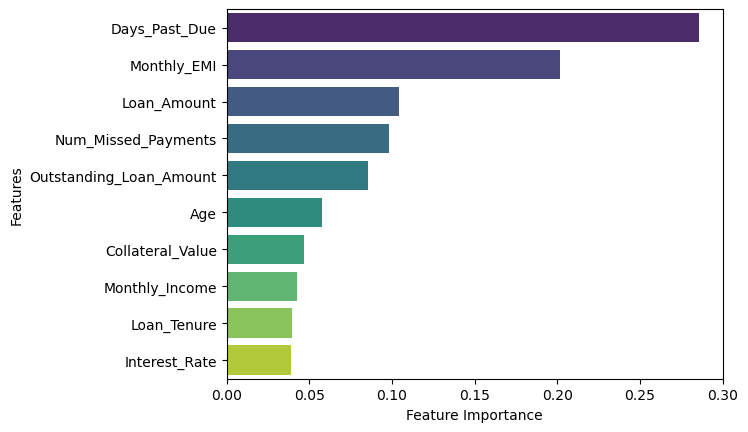

In [788]:
Feature_Importance = pd.DataFrame(rf_model.feature_importances_, index= features, columns= ['Feature Importance'])
Feature_Importance = Feature_Importance.sort_values(by='Feature Importance', ascending=False)
Feature_Importance.reset_index(names= ['Features'], inplace= True)
sns.barplot(x= 'Feature Importance', y= 'Features', data= Feature_Importance, hue= 'Features', palette= 'viridis')
plt.show()

The model shows that **Days Past Due**, **Monthly EMI** & **Loan Amount** are the strongest predictors of borrower risk, while factors like **Interest Rate** and **Loan Tenure** contribute relatively little.

Now, I'll predict risk score by testing the model on test data.

In [791]:
risk_scores = rf_model.predict_proba(x_test)[:, 1]

Since Random Forest outputs probabilities for each class, not just the predicted class(0 = Low Risk, 1 = High Risk), this returns a 2D array with shape (n_samples, 2).\
e.g.,: \
[[0.8, 0.2],   # 80% chance class 0, 20% chance class 1\
 [0.3, 0.7],   # 30% chance class 0, 70% chance class 1\
 [0.6, 0.4]]   # 60% chance class 0, 40% chance class 1

[:, 1] picks the second column, i.e., the probability of being in class 1 (High Risk borrower).

In [793]:
data_test = x_test.copy()
data_test['Risk_Score'] = risk_scores

data_test['Predicted_High_Risk'] = (data_test['Risk_Score'] > 0.5).astype(int)

- Here I copied the test features to a new DataFrame data_test.
- Then I added a new column Risk_Score: It tells the probability of how risky the borrower is; higher the risk score, higher the probability.
- Then I converted the probability to final prediction: borrower with risk score > 0.5 is prediced as **High Risk** & borrower with risk score <= 0.5 is prediced as **Low Risk**

In [795]:
data_test = data_test.merge(data[['Borrower_ID', 'Segment_Name', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
               left_index= True, right_index= True)

Now, I have the data_test DataFrame containing the test features, the predicted Risk Score, and the Predicted High Risk flag.
However, to make the results more interpretable, I also need to bring in the borrower details (like Borrower_ID, Segment_Name, and actual Recovery_Status). That's why I merged data_test with original data.
This merge is done on the row indices(left_index= True, right_index= True) since both dataset shares the same row ordering from train_test_split. This will to directly compare the model’s predictions (Risk Score, High-Risk flag) with the borrower’s actual loan recovery outcomes and collection history.

Now, I'll suggest loan recovery strategy based on the risk score:
- risk_score > 0.75 → 'Immediate legal notices & aggressive recovery attempts'
- 0.50 <= risk_score <= 0.75 → 'Settelment offers & repayment plans'
- risk score < 0.50 → 'Automated reminders & monitoring'

In [798]:
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return 'Immediate legal notices & aggressive recovery attempts'
    elif 0.50 <= risk_score <= 0.75:
        return 'Settelment offers & repayment plans'
    else:
        return 'Automated reminders & monitoring'
data_test['Recovery_Strategy'] = data_test['Risk_Score'].apply(assign_recovery_strategy)

In [799]:
data_test[['Borrower_ID', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate','Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 
'Num_Missed_Payments', 'Days_Past_Due', 'Risk_Score', 'Predicted_High_Risk', 'Recovery_Strategy']].head()

,Borrower_ID,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Recovery_Strategy
134,BRW_135,116376,644821,60,6.79,0.000000e+00,3.822280e+05,6370.47,0,0,0.00,0,Automated reminders & monitoring
344,BRW_345,106658,1958911,36,12.09,2.128380e+06,1.592191e+06,44227.52,0,0,0.81,1,Immediate legal notices & aggressive recovery ...
370,BRW_371,163697,840449,24,10.59,0.000000e+00,1.402719e+05,5844.66,3,25,0.08,0,Automated reminders & monitoring
486,BRW_487,98362,1386220,72,10.07,1.501861e+06,4.132059e+05,5738.97,3,41,0.02,0,Automated reminders & monitoring
340,BRW_341,107578,325049,48,13.43,0.000000e+00,1.968957e+05,4101.99,2,77,0.90,1,Immediate legal notices & aggressive recovery ...


I applied assign_recovery_strategy() to the test dataset(data_test DataFrame) to assign a personalized recovery strategy to each borrower to ensure **cost-effective & targeted loan recovery efforts**.

### Conclusion
By analyzing borrower profiles, payment behaviours & clustering techniques, I build a smart loan recovery system to identify high-risk borrowers early and assign targeted recovery strategies based on risk levels.